In [64]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

In [65]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [66]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 4  # time of evolution
omega = jnp.pi/T  # detuning2=1
eps = -4
Kb = 10

In [67]:
# operators
a, b = dq.destroy(na, nb)
# initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state
t_save = jnp.linspace(0, T, 50)  # save times
g2 = 1 # coupling strength

H_0 = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

In [68]:
#1.3 CHANGES FROM 1.1

alpha = jnp.sqrt(-eps/g2)


omega = 1.0  # detuning
T = 4
t_save = jnp.linspace(0, T, 50)  # save times

H_d = dq.modulated(lambda t: jnp.pi*t/(4*alpha*T) , (dq.dag(a) + a))

H = H_0 + H_d
    


|██████████| 100.0% ◆ elapsed 251.57ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


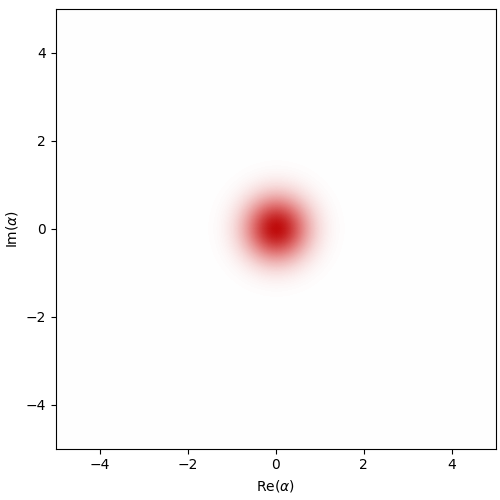

In [69]:



res = dq.mesolve(H_first, [jnp.sqrt(Kb)*b], psi0, t_save)

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a, fps=120)
# dq.plot.wigner_gif(res.states)

In [70]:
Ka = jnp.linspace(0.01,2,20)
T_z = jnp.linspace(1,4,4)
H_d = dq.modulated(lambda t: jnp.pi*t/(8*alpha*T_z) , (dq.dag(a) + a))
res = dq.mesolve(H_0+H_d, [jnp.sqrt(Kb)*b + jnp.sqrt(Ka)*a], psi0, t_save)    

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a, fps=120)

NotImplementedError: Element-wise multiplication of two qarrays with the `*` operator is not supported. For matrix multiplication, use `x @ y`. For element-wise multiplication, use `x.elmul(y)`.